In [68]:
import numpy as np
import pandas as pd

from embeddings.scorer import EmbeddingScorer
from embeddings.embedder import ImageBindEmbedder

In [ ]:
images_df = pd.read_csv('../data/images_dataset.csv')
images_df.head()

In [ ]:
audio_df = pd.read_csv('../data/audio_dataset.csv')
audio_df["genre"] = audio_df["audio_path"].apply(lambda x: x.split("\\")[-2])
audio_df.head()

# Embeddings Scoring

In [71]:
scorer = EmbeddingScorer()

In [72]:
import ast

results = {"audio_id": [], "image_id": [], "audio_path": [], "image_path": [], "score": []}
image_embs = []
for i, row in images_df.iterrows():
    list_from_str = ast.literal_eval(row['embeddings'])
    image_embs.append(np.array(list_from_str))
image_embs = np.array(image_embs)


for i, row in audio_df.iterrows():
    list_from_str = ast.literal_eval(row['embeddings'])
    emb = np.array(list_from_str).reshape(1, -1)
    top_k, scores = scorer.find_topk(query=emb, targets=image_embs, top_k=5)
    for idx, score in zip(top_k, scores):
        results["audio_id"].append(i)
        results["image_id"].append(idx)
        results["audio_path"].append(row["audio_path"])
        results["image_path"].append(images_df.iloc[idx]["image_path"])
        results["score"].append(score)

In [ ]:
res_df = pd.DataFrame(results)
res_df["genre"] = res_df["audio_path"].apply(lambda x: x.split("\\")[-2])
res_df

### Show examples for genres

In [74]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

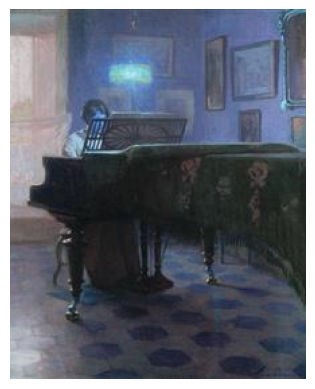

0.33502082422962715
../data/music\classicle\Aaron Dunn - Minuet - Notebook for Anna Magdalena.mp3
danielson-gambogi-elin_pianospelare-1907.jpg


In [75]:
classical_row = res_df[res_df["genre"]=="classicle"].iloc[0]
image = plt.imread("../data/images/imagesf2/" + classical_row["image_path"],  format="jpg")
if image.shape[-1] == 3 or image.shape[-1] == 4:  # RGBA
    image = image[..., ::-1]
plt.imshow(image)
plt.axis('off')
plt.show()
print(classical_row["score"])
print(classical_row["audio_path"])
print(classical_row["image_path"])
ipd.Audio(classical_row["audio_path"])

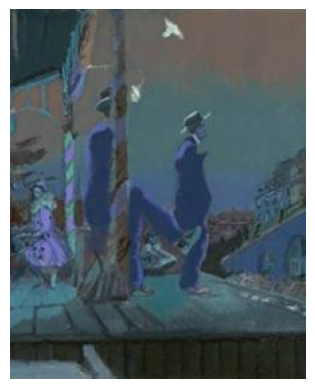

0.22708351126009357
../data/music\jazz\Sid Peacock - Noise section from Wee Green Man.mp3
walter-sickert_brighton-pierrots-1915.jpg


In [76]:
jazz_row = res_df[res_df["genre"]=="jazz"].iloc[10]
image = plt.imread("../data/images/imagesf2/" + jazz_row["image_path"],  format="jpg")
if image.shape[-1] == 3 or image.shape[-1] == 4:  # RGBA
    image = image[..., ::-1]
plt.imshow(image)
plt.axis('off')
plt.show()
print(jazz_row["score"])
print(jazz_row["audio_path"])
print(jazz_row["image_path"])
ipd.Audio(jazz_row["audio_path"])

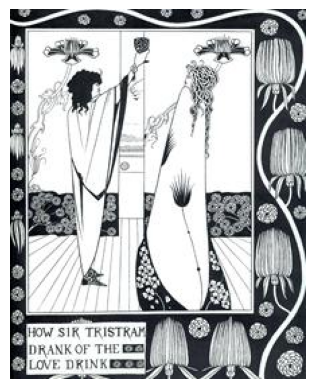

0.20402621612495886
../data/music\rock\I Am the Liquor - Boo Hod.mp3
aubrey-beardsley_how-sir-tristram-drank-of-the-love-drink-1894.jpg


In [80]:
rock = res_df[res_df["genre"]=="rock"].iloc[9]
image = plt.imread("../data/images/imagesf2/" + rock["image_path"],  format="jpg")
if image.shape[-1] == 3 or image.shape[-1] == 4:  # RGBA
    image = image[..., ::-1]
plt.imshow(image)
plt.axis('off')
plt.show()
print(rock["score"])
print(rock["audio_path"])
print(rock["image_path"])
ipd.Audio(rock["audio_path"])

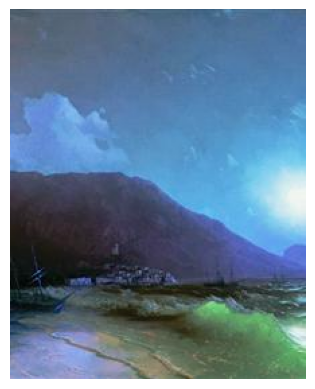

0.2009965659821485
../data/music\electronic\Aldous Ichnite - Pressure and Darkness.mp3
ivan-aivazovsky_sea-view-1867.jpg


In [79]:
electronic_row = res_df[res_df["genre"]=="electronic"].iloc[0]
image = plt.imread("../data/images/imagesf2/" + electronic_row["image_path"],  format="jpg")
if image.shape[-1] == 3 or image.shape[-1] == 4:  # RGBA
    image = image[..., ::-1]
plt.imshow(image)
plt.axis('off')
plt.show()
print(electronic_row["score"])
print(electronic_row["audio_path"])
print(electronic_row["image_path"])
ipd.Audio(electronic_row["audio_path"])